# Verification Checks

given the clustered data, let's see how accurate it is given a simple test of if data points from the same original document received the same classification

In [74]:
# libraries 

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style()

In [75]:
# importing data sets: 

original_data = pd.read_json('output.json')
training_data = pd.read_csv('nisei_w_index_matrix.csv', index_col = 0)
clustered_data = pd.read_csv('clustered_matrix.csv', index_col = 0)

In [76]:
clustered_data.head()

,PC1,PC2,PC3,Cluster
0,-2.534072,-1.129234,2.383097,1
1,-2.192395,-3.717821,1.190627,1
2,-3.216453,-2.699604,0.014101,1
3,-3.739570,-0.642134,1.027848,1
4,-3.423825,-1.016293,1.248113,1


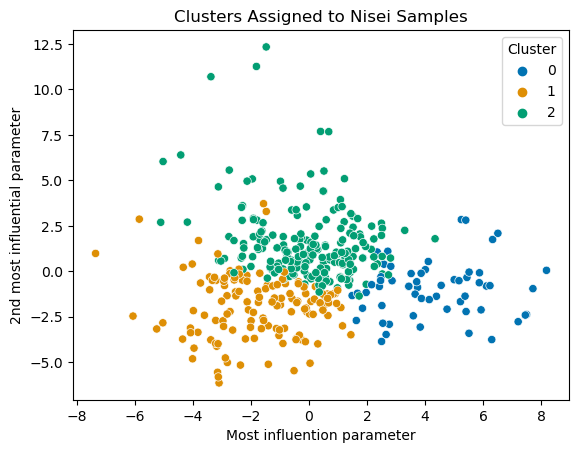

In [77]:
# plotting clusters

(sns.scatterplot(data = clustered_data, 
                 x = 'PC1', 
                 y = 'PC2', 
                 hue = 'Cluster', # splits the color of the point by the cluster it is in
                 palette = 'colorblind' ))
plt.title("Clusters Assigned to Nisei Samples")
plt.xlabel('Most influention parameter')
plt.ylabel('2nd most influential parameter')
plt.show()

In [78]:
# original_data.head()

In [79]:
training_data

,念,世,れる,—,座,把,あー,十,万,内,...,兵,員,母,知,婚,盛,移民,良,〕,originalIndex
0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,3.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97
396,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98


In [80]:
clustered_data.insert(loc = 0, column = 'originalIndex', value =  training_data['originalIndex'].values)

In [81]:
clustered_data

,originalIndex,PC1,PC2,PC3,Cluster
0,0,-2.534072,-1.129234,2.383097,1
1,0,-2.192395,-3.717821,1.190627,1
2,0,-3.216453,-2.699604,0.014101,1
3,0,-3.739570,-0.642134,1.027848,1
4,0,-3.423825,-1.016293,1.248113,1
...,...,...,...,...,...
395,97,1.419363,0.389408,-1.486535,2
396,98,1.603693,1.246596,-1.271277,2
397,98,1.862984,1.578307,-0.327658,2
398,98,4.341911,1.790587,-4.019729,2


_now to test how many data points were assigned all the same cluster, we can do a simple group by and take the average. if the average is not an integer, then not all data points were given the same cluster category_

In [86]:
stat_means_per_data_point = (clustered_data.groupby(by = 'originalIndex') # group data by index value
 .mean() # take the average 
 [['Cluster']]) # now only take the cluster value averages

stat_first_cluster_value = (clustered_data.groupby(by = 'originalIndex') # group data by index value
 .first() # take the average 
 [['Cluster']]) # now only take the cluster value averages

In [97]:
percent_matched = float(np.mean(stat_first_cluster_value == stat_means_per_data_point)) * 100

print('Percent of data points with all the same classification: ', round(percent_matched, 1), '%')

Percent of data points with all the same classification:  57.6 %


_this tells us for which data points the average cluster value corresponds to the first cluster value for each original data point and gives us a rough idea of how our classification system works._

## Discussion: 

This percentage (and on this run through is ws 57.6%) is not a very good one. When we closer examine the accuracy of this, 50% is very close to guessing, but since we have 3 clusters guessing should give 33% accuracy. So we are better than guessing if we assume that all clusters occur with equal probability. 

This however is a simple statistic, and does not tell us anyting about the classification being correct, it just tells us more about how the model groups data points that come from the same original source. To fully see if this value is better than guessing, we would need to perform a boot strap.

## Bootstrap Verification

I will be running a boot strap verification on this data set. for This, we will shuffle the labels of the data set and perform the same statistic over and over again. When we plot the statistic values over many itterations, we will find a bell curve. If our statistic lies far outside of this bell curve (say within a p-value of 0.05) we can be more certain that our model is not just randomly assigning values.

In [114]:
hypo_data = clustered_data[['originalIndex', 'Cluster']] # data to test our hypothesis against

hypo_data.head()

,originalIndex,Cluster
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [171]:
def shuffled_labels(df):
    '''returnt the shuffled label values of the Clusters column of DF'''
    labels = (df.sample(n = df.shape[0], # samples all possible data points with replacement to get unqiue assignments 
                        replace = True)
              .reset_index() # makes the index labels just numerical - now it's randomized
              [['Cluster']]) # take just the cluster value and return it as a data frame
    return labels 

    
# test

shuffled_labels(clustered_data)

,Cluster
0,1
1,2
2,0
3,2
4,2
...,...
395,1
396,2
397,0
398,2


In [172]:
def bootstrapped_data(df):
    '''take the DF and return a replica of it, 
    but this time the CLUSTER column is shuffled in its values'''
    labels = shuffled_labels(df)
    df = df.assign(**{'Cluster': labels})
    return df
  
    
# test
bootstrapped_data(hypo_data)

,originalIndex,Cluster
0,0,1
1,0,1
2,0,0
3,0,1
4,0,2
...,...,...
395,97,0
396,98,0
397,98,0
398,98,0


In [173]:
# cool now let's define the statistic

def statistic(df):
    avg_cluster = df.groupby(by = 'originalIndex').mean()[['Cluster']]
    first_cluster = df.groupby(by = 'originalIndex').first()[['Cluster']]
    proportion = float((avg_cluster == first_cluster).mean(axis = 0))
    return proportion 

In [174]:
hypo_stat = statistic(hypo_data) # keep this for later comparison

In [175]:
def bootstrap(df):
    '''run a bootstrap simulation and return the statistic values'''
    iterations = np.arange(10_000)
    stats = []
    for i in iterations:
        booted = bootstrapped_data(df)
        stat = statistic(booted)
        stats.append(stat)
    return np.array(stats)
        

In [176]:
bootstrap_stats = bootstrap(hypo_data)

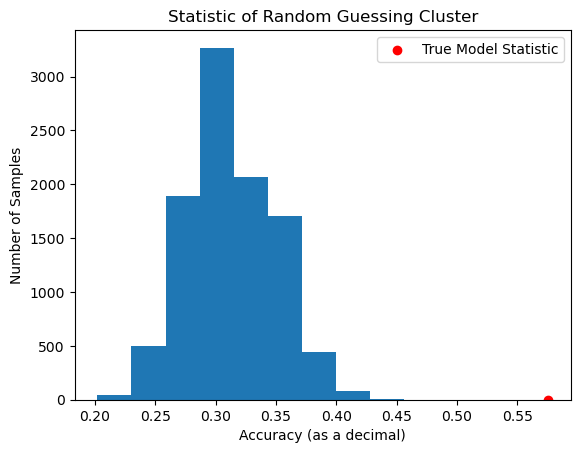

In [177]:
# now plot the histogram and find the p-value:
plt.hist(bootstrap_stats)
plt.title('Statistic of Random Guessing Cluster')
plt.scatter(hypo_stat, 0, c = 'r', label = 'True Model Statistic')
plt.ylabel('Number of Samples')
plt.xlabel('Accuracy (as a decimal)')
plt.legend()
plt.show()

_so as you can see, our statistic clearly lies well beyond the random statistic value, so we can say with strong certainty that our model is more accurate than a random-guessing model_

In [179]:
# now we export a table for others to help verify: 

tempdf = pd.read_csv('verification_table.csv', index_col = 0)
# tempdf

In [168]:
nisei_table = tempdf.assign(**{'cluster':hypo_data['Cluster']})

In [169]:
# now let's export again: 

from pathlib import Path

filepath = Path('C:\\Users\\alica\\Documents\\URAP\\URAP_NLP\\nisei_clustered_table.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  # makes a directory for the CSV file to be written into 
nisei_table.to_csv(filepath) 